**All tests**

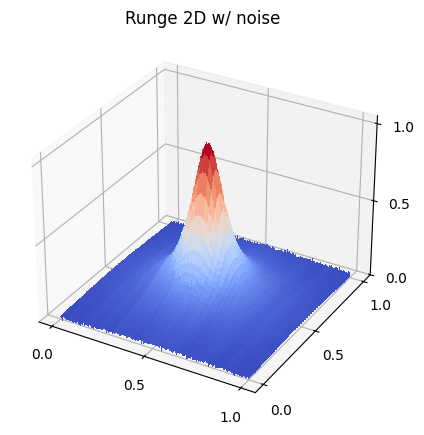

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import cm

def runge2d(x,y):
    return 1 / ((10*x-5)**2 + (10*y-5)**2 + 1)


def plot_runge2d():
    n=1000
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    X, Y = np.meshgrid(x, y)
    Z = runge2d(X,Y) + np.random.normal(0,0.01,n)


    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5,5))
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False)
    ax.set_zlim(0, 1.05)
    ax.set_title("Runge 2D w/ noise")
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.zaxis.set_major_locator(MultipleLocator(0.5))

plot_runge2d()